In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing data and converting dates to datetimes.
start_df = pd.read_csv('train.csv')

start_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [4]:
start_df.shape

(1458644, 11)

In [5]:
#first look at shape of data
start_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [6]:
start_df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Cleaning

In [7]:
start_df = start_df.dropna()

In [8]:
dup_rows = start_df[start_df.duplicated(keep= False)]
len(dup_rows)

0

In [9]:
#sensible duplicate detection with columns subset
dup_rows = start_df[start_df.duplicated(['pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude'], keep=False)]
len(dup_rows)

14

In [10]:
dup_rows.sort_values(by= 'pickup_datetime')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1135493,id3603778,2,2016-01-21 12:04:53,2016-01-21 13:35:06,3,-73.800667,40.645954,-73.985809,40.763363,N,5413
1422084,id0978620,2,2016-01-21 12:04:53,2016-01-21 13:35:06,3,-73.800667,40.645954,-73.985809,40.763363,N,5413
212931,id2805144,2,2016-02-16 21:36:35,2016-02-16 21:37:06,2,-74.008034,40.723553,-74.008034,40.723553,N,31
1333727,id0133335,2,2016-02-16 21:36:35,2016-02-16 21:37:06,2,-74.008034,40.723553,-74.008034,40.723553,N,31
403880,id2290238,2,2016-03-05 18:22:41,2016-03-05 18:25:10,2,-73.997292,40.691071,-73.999428,40.683388,N,149
840075,id0946562,2,2016-03-05 18:22:41,2016-03-05 18:25:10,2,-73.997292,40.691071,-73.999428,40.683388,N,149
445735,id1067917,2,2016-03-06 10:06:31,2016-03-07 09:59:05,4,-73.997055,40.737183,-73.991913,40.734577,N,85954
728313,id2386705,2,2016-03-06 10:06:31,2016-03-07 09:59:05,4,-73.997055,40.737183,-73.991913,40.734577,N,85954
1196478,id1417596,2,2016-03-12 16:41:35,2016-03-12 16:47:54,1,-73.974533,40.742298,-73.979507,40.750549,N,379
1407182,id0146524,2,2016-03-12 16:41:35,2016-03-12 16:47:54,1,-73.974533,40.742298,-73.979507,40.750549,N,379


In [11]:
no_dupes = start_df.drop_duplicates(subset=['pickup_datetime','pickup_longitude','pickup_latitude'],keep='last')
len(no_dupes)

1458635

In [12]:
#Outliers. The only column that makes sense for outliers is the trip duration
no_dupes['trip_duration'].describe().apply(lambda x: format(x, 'f'))

count    1458635.000000
mean         959.432584
std         5236.973471
min            1.000000
25%          397.000000
50%          662.000000
75%         1075.000000
max      3526282.000000
Name: trip_duration, dtype: object

In [13]:
str(dt.timedelta(seconds =int(no_dupes['trip_duration'].max())))

'40 days, 19:31:22'

In [14]:
# having identified the above outlier we can apply constraints on the trip duration (and other columns)
max_trip_duration = 172800 #2 days
max_passenger_count = 6 # size of a cab
max_pickup_longitude = -73.68 #NYC city limits
max_pickup_latitude = 40.92
min_pickup_longitude = -74.27 #NYC city limits
min_pickup_latitude = 40.49

In [15]:
cleaning_df = no_dupes
len(cleaning_df)

1458635

In [16]:
"""
This block removes the outliers in trip duration and places the sensible constraints on the other columns
Whilst reporting at each stage the size of the DF to see how much data is trimmed at each stage
"""

cleaning_df['passenger_count'] = cleaning_df['passenger_count'].replace(0, 1)
cleaning_df = cleaning_df[cleaning_df['passenger_count']<= max_passenger_count]
cleaning_df = cleaning_df[cleaning_df['passenger_count']<= max_passenger_count]
print(f"len after passenger count {len(cleaning_df)}")
cleaning_df = cleaning_df[cleaning_df['trip_duration']<max_trip_duration]
print(f"len after trip duration {len(cleaning_df)}")
cleaning_df = cleaning_df[cleaning_df['pickup_latitude']>=min_pickup_latitude]
cleaning_df = cleaning_df[cleaning_df['pickup_latitude']<=max_pickup_latitude]
print(f"len after latitude {len(cleaning_df)}")
cleaning_df = cleaning_df[cleaning_df['pickup_longitude']>=min_pickup_longitude]
cleaning_df = cleaning_df[cleaning_df['pickup_longitude']<=max_pickup_longitude]
print(f"len after longitude {len(cleaning_df)}")

C:\Users\alast\AppData\Local\Temp\ipykernel_6192\2323731633.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaning_df['passenger_count'] = cleaning_df['passenger_count'].replace(0, 1)


len after passenger count 1458630
len after trip duration 1458626
len after latitude 1458456
len after longitude 1458335


In [17]:
#set pickup and dropoff to datetimes
cleaning_df[["pickup_datetime", "dropoff_datetime"]] = cleaning_df[["pickup_datetime", "dropoff_datetime"]].apply(pd.to_datetime)

In [18]:
#this cell checks that the duration matches the pickup and dropoff times
for index, row in cleaning_df.iterrows():
    time_calc = (row['dropoff_datetime']-row['pickup_datetime']).seconds
    if row['trip_duration'] != time_calc:
        print(f'mismatch in time {index}')

In [19]:
cleaning_df['weekday'] = cleaning_df['pickup_datetime'].dt.dayofweek
cleaning_df['hour_of_day'] = cleaning_df['pickup_datetime'].dt.hour

Starting to encode the categorical data

In [20]:
#checking how many vendors there are
cleaning_df['vendor_id'].value_counts()

vendor_id
2    780182
1    678153
Name: count, dtype: int64

In [21]:
cleaning_df['store_and_fwd_flag'].replace('N', 0, inplace=True)
cleaning_df['store_and_fwd_flag'].replace('Y', 1, inplace=True)
cleaning_df['id'] = cleaning_df['id'].str.removeprefix('id')
cleaning_df['id'] = pd.to_numeric(cleaning_df['id'])
cleaning_df.reset_index()

,index,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,hour_of_day
0,0,2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0,17
1,1,2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,0
2,2,3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,11
3,3,3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2,19
4,4,2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458330,1458639,2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,4,13
1458331,1458640,1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,6,7
1458332,1458641,2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,4,6
1458333,1458642,2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,1,15


In [22]:
cleaning_df.dtypes

id                             int64
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                  int64
weekday                        int32
hour_of_day                    int32
dtype: object

In [23]:
cleaning_df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,hour_of_day
0,2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0,17
1,2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,0
2,3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,11
3,3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2,19
4,2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,5,13


In [24]:
cleaned_df = cleaning_df

Insights

(array([53227., 38559., 27959., 20884., 15780., 14996., 33243., 55596.,
        67043., 67652., 65421., 68464., 71863., 71465., 74282., 71800.,
        64300., 76469., 90581., 90296., 84053., 84166., 80466., 69770.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

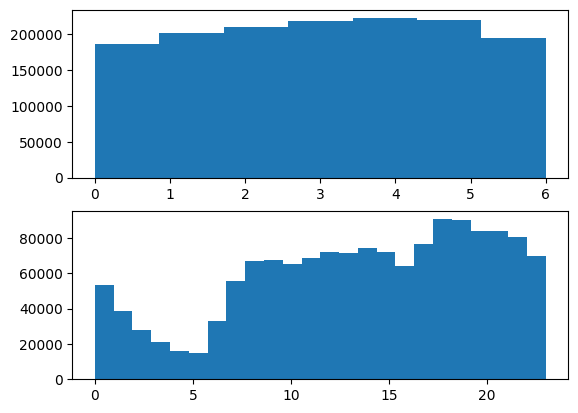

In [25]:
fig, (ax1,ax2) = plt.subplots(2)
ax1.hist(cleaned_df.weekday.to_numpy(), bins=7)
ax2.hist(cleaned_df.hour_of_day.to_numpy(),bins=24)


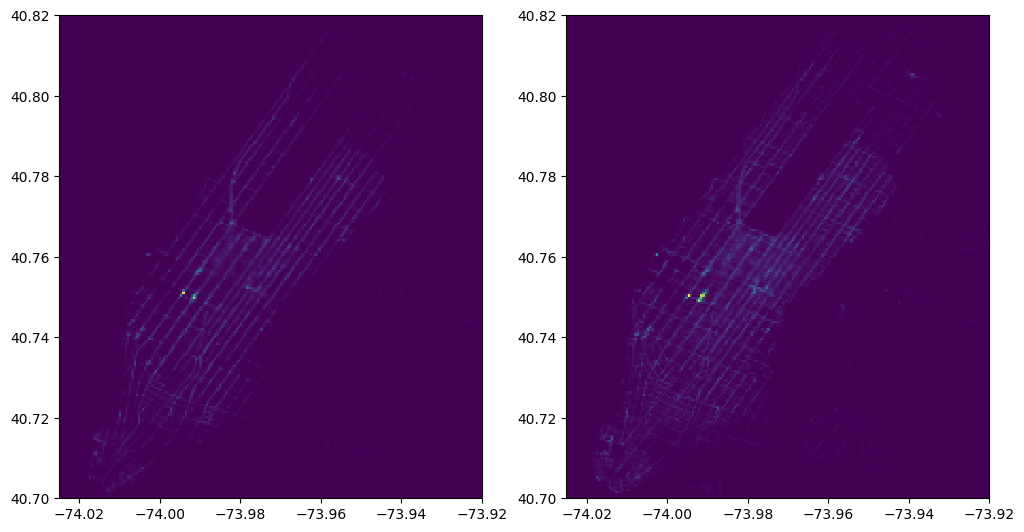

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))
ax1.set_aspect(True)
ax2.set_aspect(True)

ax1.hist2d(cleaned_df.pickup_longitude.to_numpy(),cleaned_df.pickup_latitude.to_numpy(),
           bins=[np.linspace(-74.025, -73.92, 200), np.linspace(40.7,40.82,200)])
ax2.hist2d(cleaned_df.dropoff_longitude.to_numpy(),cleaned_df.dropoff_latitude.to_numpy(),
           bins=[np.linspace(-74.025, -73.92, 200), np.linspace(40.7,40.82,200)])
plt.show()

C:\Users\alast\AppData\Local\Temp\ipykernel_6192\37710270.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax1.scatter(df.pickup_longitude.to_numpy(),df.pickup_latitude.to_numpy(),


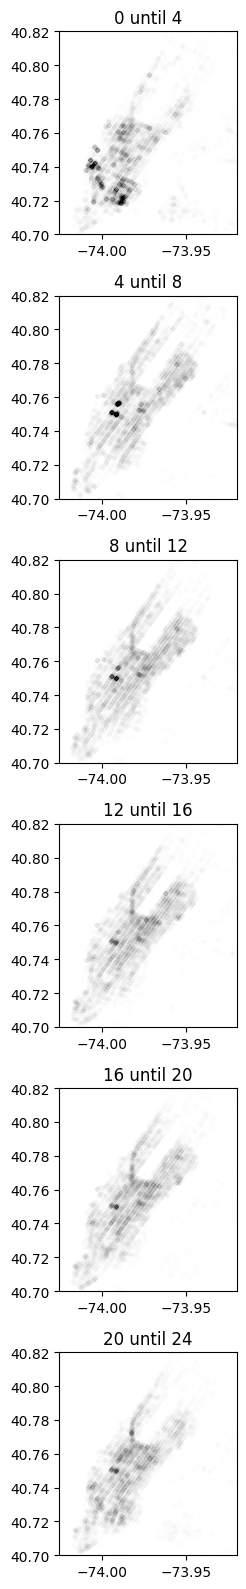

In [29]:
bins = [
    (0, 4),
    (4, 8),
    (8,12),
    (12,16),
    (16,20),
    (20,24)
]

fig, axes = plt.subplots(len(bins), figsize=(15,16), tight_layout=True)
for bin_lims, ax1 in zip(bins, axes):
    bin_min, bin_max = bin_lims
    sub_df = cleaned_df[(bin_min<cleaned_df['hour_of_day']) & (cleaned_df['hour_of_day'] <bin_max)]
    df = sub_df.sample(n=10000)

    # fig, ax1 = plt.subplots(figsize=(12,8), sharex=True, sharey=True)
    ax1.set_aspect(True)
    ax1.set_title(f"{bin_min} until {bin_max}")
    sc = ax1.scatter(df.pickup_longitude.to_numpy(),df.pickup_latitude.to_numpy(),
            c='k', alpha=0.002, marker='.', cmap = 'twilight')

    #fig.colorbar(sc, ax=ax1)
    ax1.set_xlim(-74.025, -73.92)
    # ax2.set_xlim(-74.025, -73.92)
    ax1.set_ylim(40.7,40.82)

    # ax2.set_ylim(40.7,40.82)

plt.show()